## Polynomial_Regression

In [1]:
# Day 3 — Polynomial Regression, Multiple Regression, Regularization

### Imports & dataset (code)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

### Creating curved data for practice

In [3]:
np.random.seed(42)

# Feature (X)
X = 2 * np.random.rand(100, 1)
# Target (y) created using a nonlinear equation
y = 4 + 3*X + 2*(X**2) + np.random.randn(100, 1)

**y**: (4+3x+2x^2)

### Polynomial Features

In [4]:
poly = PolynomialFeatures(degree=2, include_bias=False)
# Transform X → [x, x²]
X_poly = poly.fit_transform(X)


**What this code does from sklearn.preprocessing import PolynomialFeatures**: 
This line imports the necessary class to create polynomial features.
poly = PolynomialFeatures(degree=2, include_bias=False): This creates an instance of the PolynomialFeatures transformer
degree=2: Specifies that we want to create polynomial features up to the second degree. This will generate terms like \(x\) and \(x^{2}\)
include_bias=False: This tells the transformer not to add a constant term (a column of ones) to the output feature matrix
X_poly = poly.fit_transform(X): This performs two actions:fit(): It learns the features from the data in X.transform(): 
It applies the feature creation to X, generating the new polynomial features. The result is a new matrix X_poly

### Fit Linear Regression on Polynomial Features

In [5]:
model = LinearRegression()
model.fit(X_poly, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[1.63887939 2.5810637 ]]
Intercept: [4.56140272]


**Explaination**
model = LinearRegression(): This line initializes an instance of the LinearRegression class from scikit-learn. This object represents the linear regression model that will be trained.

model.fit(X_poly, y): This line trains the LinearRegression model.

X_poly represents the independent variables (features) after they have been transformed into polynomial features. This transformation (e.g., using PolynomialFeatures from sklearn.preprocessing) 
creates new features that are powers of the original features, allowing a linear model to fit non-linear relationships.

y represents the dependent variable (target).

The fit() method calculates the optimal coefficients and intercept for the linear equation that best describes the relationship between X_poly and y.

print("Coefficients:", model.coef_): After fitting, the model.coef_ attribute stores the learned coefficients for each of the polynomial features in X_poly.
    These coefficients represent the weights assigned to each feature in the linear equation.

print("Intercept:", model.intercept_): The model.intercept_ attribute stores the learned intercept (also known as the bias term or constant) of the linear equation. 
    This value represents the predicted value of y when all features are zero.

### Visualize the polynomial curve

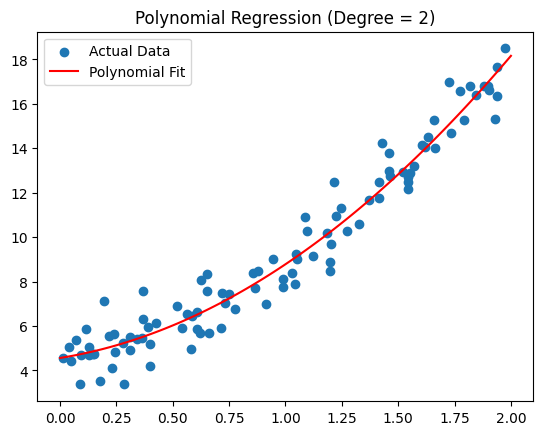

In [8]:
X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

plt.scatter(X, y, label="Actual Data")
plt.plot(X_new, y_pred, color="red", label="Polynomial Fit")
plt.title("Polynomial Regression (Degree = 2)")
plt.legend()
plt.show()

**Explaination**
X_new = np.linspace(0, 2, 100).reshape(100, 1): Creates 100 evenly spaced points between 0 and 2 to form a smooth line for plotting.

X_new_poly = poly.transform(X_new): Transforms these new points into polynomial features using the same degree settings as the original training data.

y_pred = model.predict(X_new_poly): Uses the trained polynomial regression model to predict the corresponding y-values for the smooth line points.

plt.scatter(X, y, label="Actual Data"): Plots the original, actual data points as a scatter plot on the graph.

plt.plot(X_new, y_pred, color="red", label="Polynomial Fit"): Draws the smooth, red polynomial regression line over the scatter plot.

## MULTIPLE REGRESSION

In [9]:
# Creating simple multiple-feature dataset
np.random.seed(42)
m = 100

size = 2 * np.random.rand(m, 1)           # feature 1
rooms = 5 * np.random.rand(m, 1)          # feature 2
age = np.random.rand(m, 1)                # feature 3

# Combining
X_multi = np.hstack([size, rooms, age])

# Target (simple formula)-->
y_multi = 50 + 20*size + 10*rooms - 5*age + np.random.randn(m, 1)

### Fit Multiple Regression

In [10]:
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)

print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)

Coefficients: [[20.20796463 10.04170994 -4.67065182]]
Intercept: [49.59997212]


### REGULARIZATION (to prevent overfitting)

In [11]:
#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_poly, y)

print("Ridge Coefficients:", ridge.coef_)

Ridge Coefficients: [1.51975724 2.61997689]


**Means**
ridge = Ridge(alpha=1.0): Initializes a Ridge regression model, setting the regularization strength parameter alpha to 1.0.

ridge.fit(X_poly, y): Trains the ridge model using the transformed polynomial features (X_poly) and the target variable (y).

print("Ridge Coefficients:", ridge.coef_): Prints the calculated weights (coefficients) assigned to each polynomial feature by the trained Ridge model.

In [12]:
#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)

print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [0.        3.3004528]


**Means**
lasso = Lasso(alpha=0.1): Initializes a Lasso regression model, setting the regularization strength parameter alpha to 0.1.

lasso.fit(X_poly, y): Trains the lasso model using the transformed polynomial features (X_poly) and the target variable (y).

print("Lasso Coefficients:", lasso.coef_): Prints the calculated weights (coefficients) assigned to each polynomial feature by the trained Lasso model.

In [13]:
print("""
Day 3 Summary:
- Polynomial Regression is still linear regression, but with curved features (x², x³).
- Useful when data has non-linear patterns.
- Multiple Regression uses more than one feature.
- Regularization prevents overfitting.
- Ridge shrinks all weights.
- Lasso can shrink some weights to zero (feature selection).
""")


Day 3 Summary:
- Polynomial Regression is still linear regression, but with curved features (x², x³).
- Useful when data has non-linear patterns.
- Multiple Regression uses more than one feature.
- Regularization prevents overfitting.
- Ridge shrinks all weights.
- Lasso can shrink some weights to zero (feature selection).

